In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
data = pd.read_csv('aw_fb_data.csv')


In [4]:
data.head(20)

,Unnamed: 0,X1,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
0,1,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,apple watch,Lying
1,2,2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,apple watch,Lying
2,3,3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,apple watch,Lying
3,4,4,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,apple watch,Lying
4,5,5,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,apple watch,Lying
5,6,6,20,1,168.0,65.4,14.290909,78.803129,11.495667,0.011174,6.221612,6.116349,59.0,1.000000,19.803129,0.140448,0.264722,0.159691,apple watch,Sitting
6,7,7,20,1,168.0,65.4,14.994805,78.890564,12.166222,0.011744,6.221612,6.116349,59.0,1.000000,19.890564,0.141068,0.264722,0.176096,apple watch,Sitting
7,8,8,20,1,168.0,65.4,15.698701,78.977999,12.836778,0.012313,6.221612,6.116349,59.0,1.000000,19.977999,0.141688,0.264722,0.193303,apple watch,Sitting
8,9,9,20,1,168.0,65.4,16.402597,79.065434,13.507333,0.012883,6.221612,6.116349,59.0,1.000000,20.065434,0.142308,0.264722,0.211311,apple watch,Sitting
9,10,10,20,1,168.0,65.4,17.106494,79.152869,14.177889,0.013452,6.221612,6.116349,59.0,1.000000,20.152869,0.142928,0.264722,0.230121,apple watch,Sitting


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6264 entries, 0 to 6263
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            6264 non-null   int64  
 1   X1                    6264 non-null   int64  
 2   age                   6264 non-null   int64  
 3   gender                6264 non-null   int64  
 4   height                6264 non-null   float64
 5   weight                6264 non-null   float64
 6   steps                 6264 non-null   float64
 7   hear_rate             6264 non-null   float64
 8   calories              6264 non-null   float64
 9   distance              6264 non-null   float64
 10  entropy_heart         6264 non-null   float64
 11  entropy_setps         6264 non-null   float64
 12  resting_heart         6264 non-null   float64
 13  corr_heart_steps      6264 non-null   float64
 14  norm_heart            6264 non-null   float64
 15  intensity_karvonen   

In [6]:
print(data.isnull().sum())

Unnamed: 0              0
X1                      0
age                     0
gender                  0
height                  0
weight                  0
steps                   0
hear_rate               0
calories                0
distance                0
entropy_heart           0
entropy_setps           0
resting_heart           0
corr_heart_steps        0
norm_heart              0
intensity_karvonen      0
sd_norm_heart           0
steps_times_distance    0
device                  0
activity                0
dtype: int64


----WYKRESY ROZKŁADU DLAZMIENNYCHLICZBOWYCH---

In [7]:
# Filtracja kolumn o typie float64
float_cols = data.select_dtypes(include=['float64']).columns

# Wyświetlenie kolumn o typie float64
print("Kolumny z wartościami float64:", float_cols.tolist())


Kolumny z wartościami float64: ['height', 'weight', 'steps', 'hear_rate', 'calories', 'distance', 'entropy_heart', 'entropy_setps', 'resting_heart', 'corr_heart_steps', 'norm_heart', 'intensity_karvonen', 'sd_norm_heart', 'steps_times_distance']


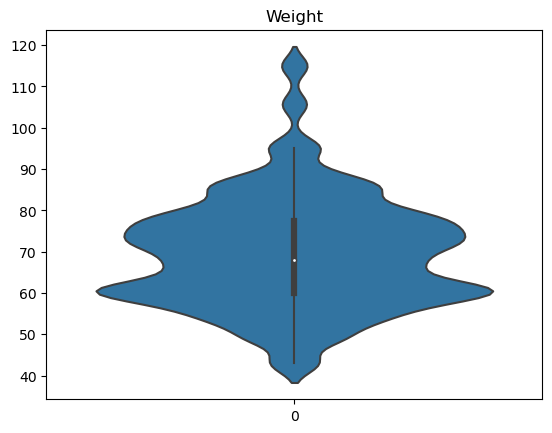

In [9]:
sns.violinplot(data=data["weight"])
plt.title("Weight")
plt.show()

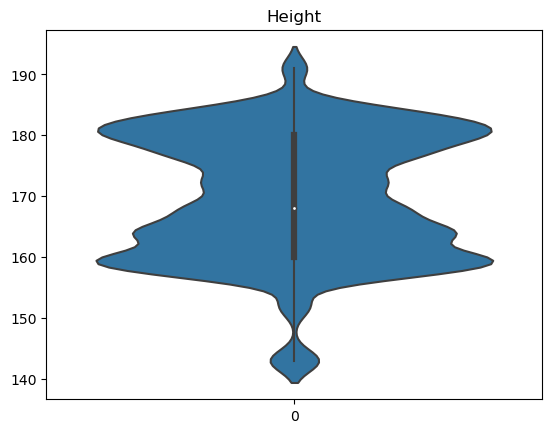

In [11]:
sns.violinplot(data=data["height"])
plt.title("Height")
plt.show()

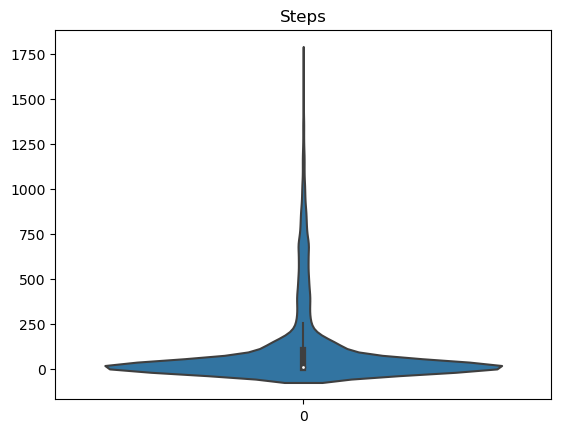

In [12]:
sns.violinplot(data=data["steps"])
plt.title('Steps')
plt.show()

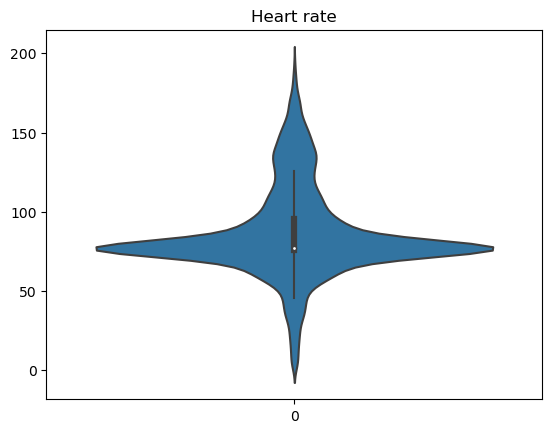

In [14]:
sns.violinplot(data=data["hear_rate"])
plt.title("Heart rate")
plt.show()

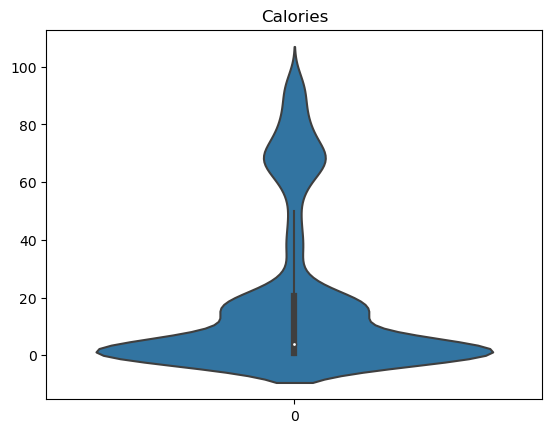

In [15]:
sns.violinplot(data=data['calories'])
plt.title("Calories")
plt.show()

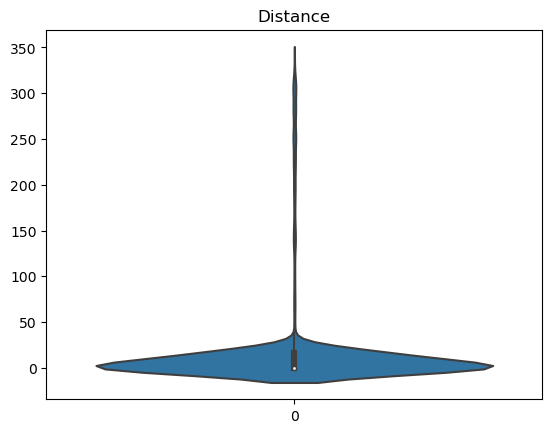

In [16]:
sns.violinplot(data=data["distance"])
plt.title("Distance")
plt.show()

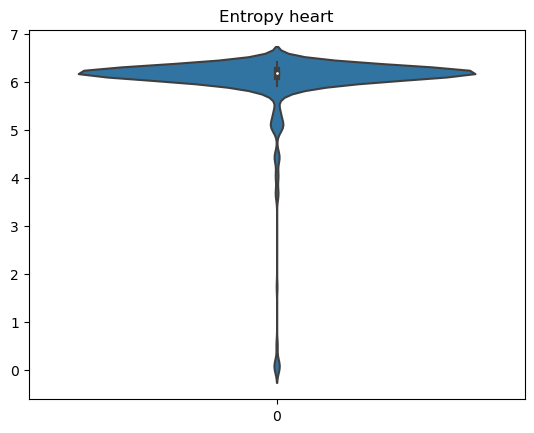

In [17]:
sns.violinplot(data=data["entropy_heart"])
plt.title("Entropy heart")
plt.show()

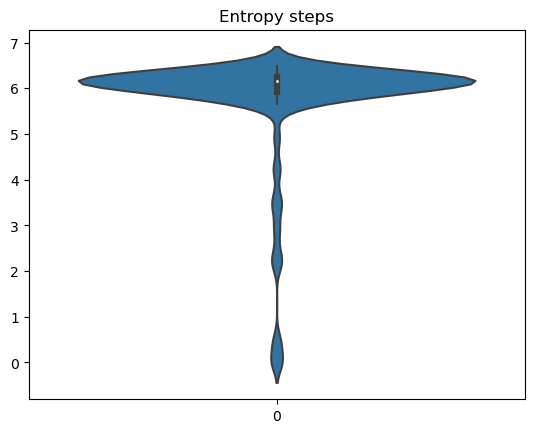

In [18]:
sns.violinplot(data=data["entropy_setps"])
plt.title("Entropy steps")
plt.show()

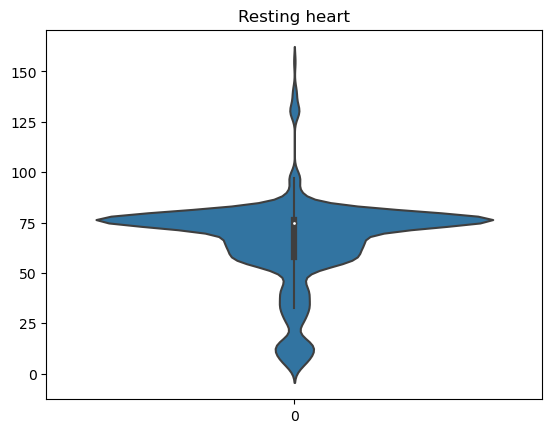

In [19]:
sns.violinplot(data=data["resting_heart"])
plt.title("Resting heart")
plt.show()

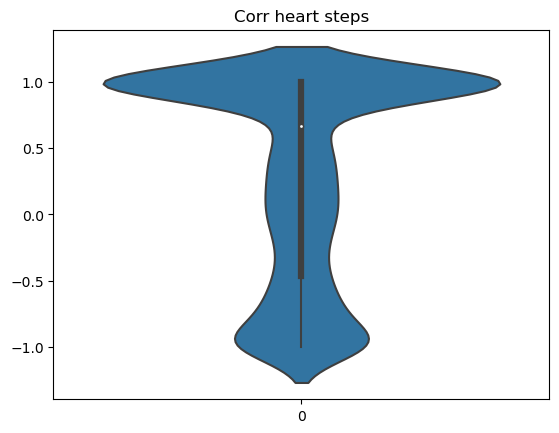

In [20]:
sns.violinplot(data=data["corr_heart_steps"])
plt.title("Corr heart steps")
plt.show()

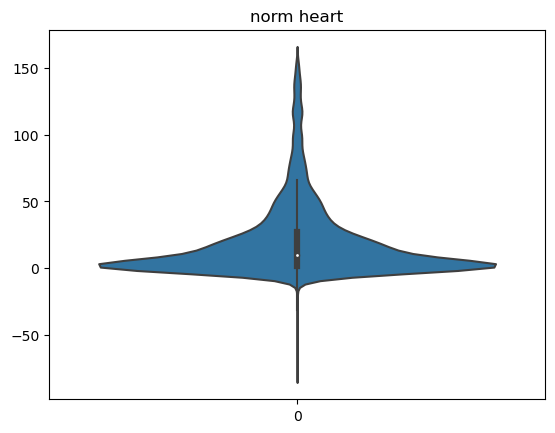

In [21]:
sns.violinplot(data=data["norm_heart"])
plt.title("norm heart")
plt.show()

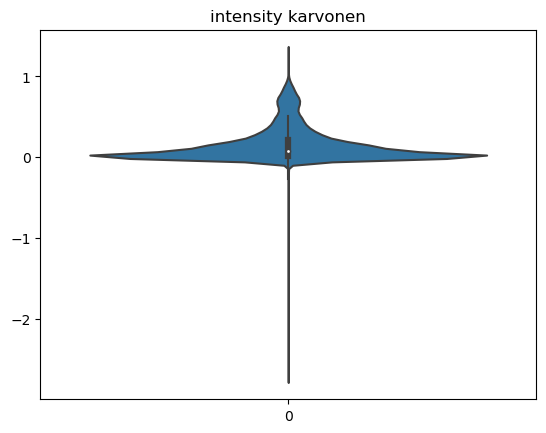

In [22]:
sns.violinplot(data=data["intensity_karvonen"])
plt.title("intensity karvonen")
plt.show()

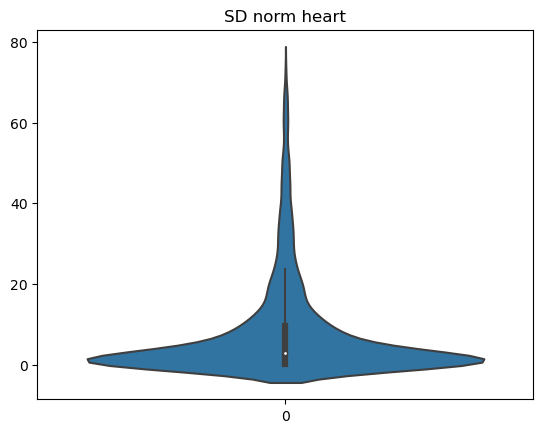

In [23]:
sns.violinplot(data=data["sd_norm_heart"])
plt.title("SD norm heart")
plt.show()

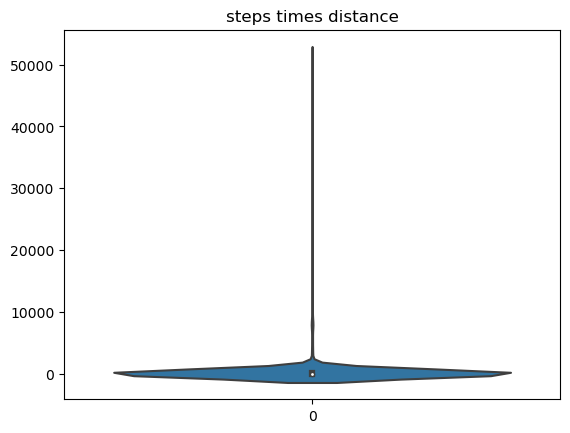

In [24]:
sns.violinplot(data=data["steps_times_distance"])
plt.title("steps times distance")
plt.show()

Przewiduje spalone kalorie na podstawie danych z wearables (np. liczba kroków, tętno, czas snu). (bierzemy cechy typu steps, heart rate, sleep duration, oxygen level i uzywamy RandomForestRegressor zeby nam to zaplanowal. to bedzie ciagla dlatego regressor a classifier). y to bedzie calories burned ALBO Health score przy jakis innych zmiennych). Prognozowanie spalania kalorii może być użyte do dostosowania obciążenia treningowego.- jak to zakodowac w pythonie

In [25]:
# Przykładowy DataFrame
data = {
    'steps': [8000, 12000, 5000, 10000, 15000],
    'heart_rate': [70, 85, 65, 75, 80],
    'sleep_duration': [6, 7, 8, 5, 7],
    'oxygen_level': [95, 98, 92, 96, 97],
    'calories_burned': [200, 300, 150, 250, 350]
}
df = pd.DataFrame(data)

# X - cechy, y - cel (kalorie spalane)
X = df[['steps', 'heart_rate', 'sleep_duration', 'oxygen_level']]
y = df['calories_burned']


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
# Inicjalizacja modelu
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Dopasowanie modelu do danych treningowych
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)